Videos recomendados:
- Batch vs SGD: https://youtu.be/2p58rVgqsgo
- Mini-batch size: https://youtu.be/GrrO1NFxaW8
- Number of hidden units: https://youtu.be/IkGAIQH5wH8
- Learning rate: https://youtu.be/TwJ8aSZoh2U
- Learning rate 2: https://youtu.be/HLMjeDez7ps
- Overfitting: https://youtu.be/EeBZpb-PSac
- Overfitting 2: https://youtu.be/SVqEgaT1lXU
- Early Stopping: https://youtu.be/NnS0FJyVcDQ
- Regularization: https://youtu.be/aX_m9iyK3Ac
- Dropout: https://youtu.be/Ty6K6YiGdBs
- Dropout 2: https://youtu.be/6DcImJS8uV8
- Dropout 3: https://youtu.be/8nG8zzJMbZw
- Vanishing gradient: https://youtu.be/W_JJm_5syFw
- Other activatin functions: https://youtu.be/VzGOR5SlFSw
- Local minima: https://youtu.be/gF_sW_nY-xw
- Random restart: https://youtu.be/idyBBCzXiqg
- Momentum: https://youtu.be/r-rYz_PEWC8

In [1]:
%load_ext autoreload
%autoreload 2

# Overfitting en clasificación
<img src="images/classif_overfitting.png" alt="Drawing" style="width:60%;"/>

# Overfitting en regresión lineal
<img src="images/regress_overfitting.png" alt="Drawing" style="width:70%; "/>

# ¿Como se mide la performance de un algoritmo de apredizaje?
(Loss function, Objective function)


# <center>Regresion lineal (Media de error cuadratico): </center>
<center>$J(\theta) = \frac{1}{2m}\sum{_{i=1}^m[h_\theta(x^{(i)})-y^{(i)}]^2}$</center>

<center>$L = \sum{_{i=1}^n[f(x_i; w)-y_i]^2}$</center>

# <center>Regresion logistica (Clasificacion, Cross-entropy):</center>
<center>$J(\theta) = -\frac{1}{m}[\sum{_{i=1}^my^{(i)}logh_\theta(x^{(i)}) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))}]$</center>

# <center>Redes neuronales (Para clasificación):</center>
<center>$J(\theta) = -\frac{1}{m}[\sum{_{i=1}^m\sum{_{k=1}^K}y_k^{(i)}logh_\theta(x^{(i)})_k + (1-y_k^{(i)})log(1-h_\theta(x^{(i)})_k)}]$</center>


# <center>¿Cual es la $h_\theta(x^{(i)})$ en cada caso?</center>

$h_\theta(x^{(i)})_{lin} = \theta_0 + x_1^{(i)} \theta_1 + x_2^{(i)} \theta_2 + ... + x_n^{(i)} \theta_n$

$h_\theta(x^{(i)})_{log} = \sigma (h_\theta(x^{(i)})_{lin})$

# <center>Para simplifaciar escribiremos la función de esta forma en general:<center>
<center>$\huge L = ||\hat{y}-y_i||^2$</center>

# Notacion:
- $J(\theta)$ ó $L$: Loss function, objective function, cost function
- $x^{(i)}$: Mediciones, variables independientes, features, covariates. Es un vector de dimensión $d$, cada $i$ indica una medición diferente
- $y^{(i)}$: Salida, etiqueta, label, target. La salida $i$-esima corresponde a la entrada $i$-esima
- $m$ ó $n$: Cantidad de mediciones
- $\theta$ ó $w$: Parametros a estimar. Son un total de $d+1$
- $h_{\theta}(x^{(i)})$ ó $f(x_i;w)$: Salida de mi estimador
- $K$: Cantidad de salidas de la red neuronal

# Soluciones al overfitting
- Early stop
- Reducción de la cantidad de parametros
- Regularización L0, L1, L2
- Dropout (Solo para redes neuronales)
- Batch Normalization
- Aumentar el tamaño del dataset: Buscar más datos o generarlo en forma artificial (Data augmentation)

## Early stop
### Cambiar degree, batch_size, learning_rate

In [2]:
import numpy as np
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy') 
y_test = np.load('y_test.npy')

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import optimizers
from fnn_helper import PlotLosses
import reg_helper as RHelper
from matplotlib import pyplot as plt

In [4]:
def get_basic_model(input_shape, output_size, lr=0.1):
    model = Sequential()
    sgd = optimizers.SGD(lr=lr)
    model.add(Dense(output_size, input_dim=input_shape,
                    activation='sigmoid', 
                    kernel_initializer='normal', 
                    name='Salida'
                   ))
    model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

degree = 10
X_train_degree = RHelper.get_polynimial_set(X_train, degree=degree)[:, 1:]
X_test_degree = RHelper.get_polynimial_set(X_test, degree=degree)[:, 1:]
basic_model = get_basic_model(X_train_degree.shape[1], 1)
basic_model.summary()
print(X_train_degree.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Salida (Dense)               (None, 1)                 66        
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
(59, 65)


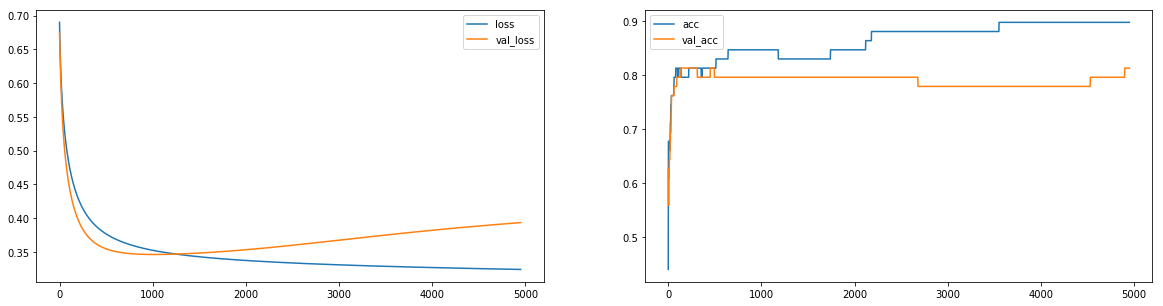

In [5]:
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test_degree, y_val_categorical=y_test)
basic_model = get_basic_model(X_train_degree.shape[1], 1, lr=1)
basic_model.fit(X_train_degree, 
          y_train, batch_size = 59,
          epochs=5000, 
          verbose=0, 
          validation_data=(X_test_degree, y_test), 
          callbacks=[plot_losses],
         )

## Reducción de la cantidad de parametros

/Users/julianganzabal/anaconda3/envs/mllab/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Regresion Logistica Polinomial de orden 18, con lamdba (regularización L2):0


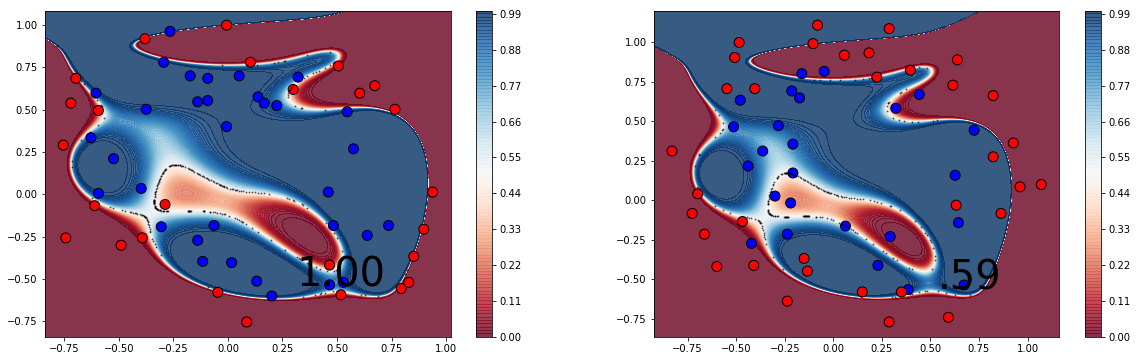

In [6]:
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=18)

Regresion Logistica Polinomial de orden 2, con lamdba (regularización L2):0


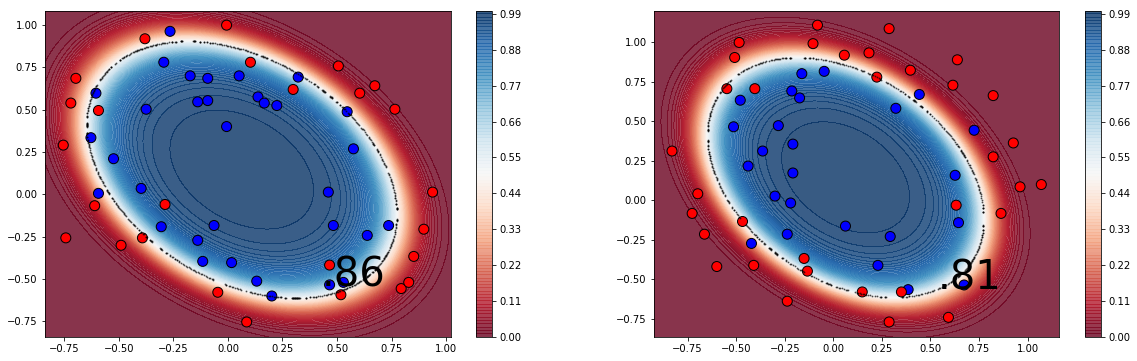

In [7]:
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=2)

/Users/julianganzabal/anaconda3/envs/mllab/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Regresion Logistica Polinomial de orden 6, con lamdba (regularización L2):0


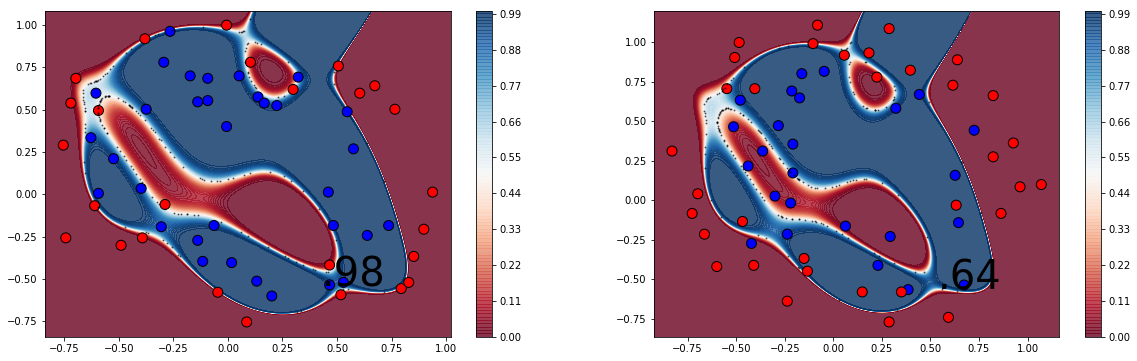

In [8]:
_ = RHelper.fit_and_get_regions(X_train, y_train, X_test, y_test, degree=6)

In [10]:
options = [{'degree': 1, 'lambd': 0}, 
           {'degree': 2, 'lambd': 0}, 
           {'degree': 3, 'lambd': 0}, 
           {'degree': 4, 'lambd': 0}, 
           {'degree': 5, 'lambd': 0}, 
           {'degree': 6, 'lambd': 0}, 
           {'degree': 7, 'lambd': 0}, 
           {'degree': 8, 'lambd': 0}, 
           {'degree': 9, 'lambd': 0}, 
           {'degree': 10, 'lambd': 0},
           {'degree': 11, 'lambd': 0},
           {'degree': 12, 'lambd': 0},
           {'degree': 13, 'lambd': 0},
           {'degree': 14, 'lambd': 0}, 
           {'degree': 15, 'lambd': 0}, 
           {'degree': 16, 'lambd': 0}, 
           {'degree': 17, 'lambd': 0}, 
           {'degree': 18, 'lambd': 0}
           ]
degrees_0, lambdas_0, train_acc_array_0, test_acc_array_0, coefs_array_mean_0, coefs_array_std_0, coefs_abs_max_0 = RHelper.test_options(X_train, y_train, X_test, y_test, options, plot_it=False)

Accuracies


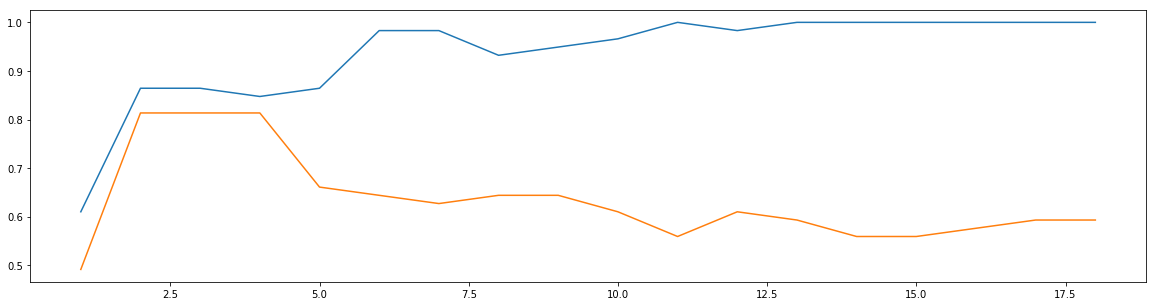

Medias de los pesos


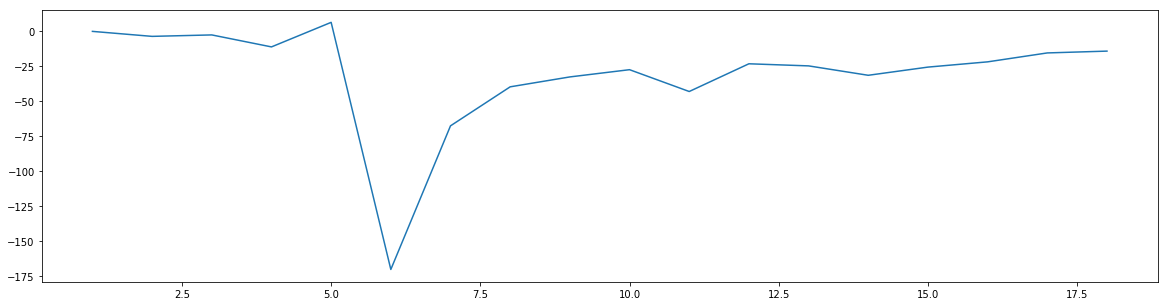

STDs de los pesos


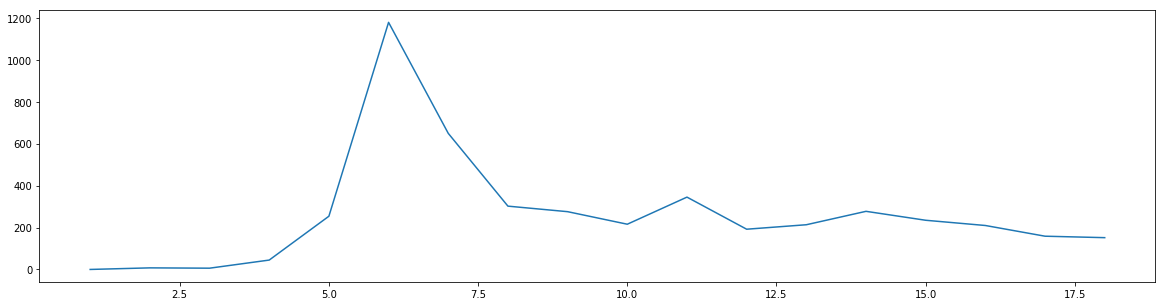

Maximo de los pesos


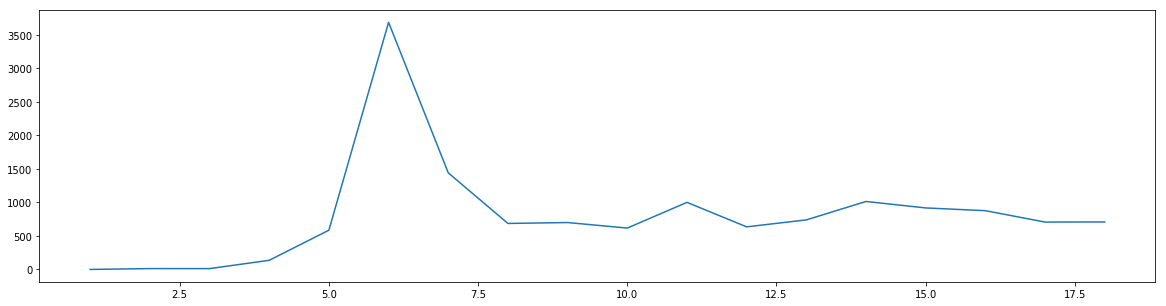

In [14]:
print("Accuracies")
plt.figure(figsize=(20,5))
plt.plot(degrees_0, train_acc_array_0)
plt.plot(degrees_0, test_acc_array_0)
plt.show()
plt.figure(figsize=(20,5))
print("Medias de los pesos")
plt.plot(degrees_0, coefs_array_mean_0)
plt.show()
plt.figure(figsize=(20,5))
print("STDs de los pesos")
plt.plot(degrees_0, coefs_array_std_0)
plt.show()
plt.figure(figsize=(20,5))
print("Maximo de los pesos")
plt.plot(degrees_0, coefs_abs_max_0)
plt.show()

# Regularización

$$ \huge L = ||\hat{y}-y_i||^2 + \lambda g(w)$$

donde:

$\lambda > 0$ y $g(w)$ una funcion que penalizara ciertos valores de $w$

** Nota importante**: Normalmente estos modelos requieren normalización 

Ejemplo video Udacity:
https://youtu.be/aX_m9iyK3Ac
<img src="2points.png" alt="Drawing" style="width:60%;"/>

Las sigmoideas y el problema del gradient descent

<img src="sigmoideas.png" alt="Drawing" style="width:60%;"/>

**Bertrand Russell**: El problema principal con la Inteligencia Artificial es que los modelos malos estan muy seguros de si mismos mientras que los buenos estan llenos de dudas

## Ridge regression -L2 regularization-
Creencia a priori de que los w's deberias ser chicos (prior belief)
- Restringe los valores altos de $w$ todos por igual ($0.5^2 + 0.5^2 < 1^2+0^2$)
- Se puede demostrar que es un estimador polarizado de los w's, pero posee menor varianza que simplemente minimizar L
- $g(w) = \|w\|^2$ 
- Es muy importante preprocesar: restar media y dividir por desvio por que $\lambda$ es el mismo para todos los $w$'s

**Para regresión lineal (Maximum Likelihood)**  
$Y \sim N(Xw, \sigma^2I)$ Donde los $w$'s son los ground truth - likelihood -  
maximizo log $p(y|X,w)$  
$w_{ML} = (X^TX)^{-1}X^T y$  
$E[w_{ML}] = w$ -> Estimador no polarizado. Los $w_{ml}$ son V.A y hacer least squares es muestrearlas  
$\Sigma[w_{ML}] = \sigma^2 (X^TX)^{-1}$ -> Si esta varianza es grande, no es un buen estimador  

In [15]:
import numpy as np
# Ejemplo, primer columna de 1s para w0, segunda lineal, tercera cuadratica
X = np.matrix([[1, 1, 1], [1, 2, 4], [1, 3, 8], [1, 4, 16], [1, 5, 32], [1, 6, 64]])
# Ejemplo2, alta correlación entre segunda y tercera columna
X2 = np.matrix([[1, 1, 1.1], [1, 2, 2.2], [1, 3, 3.2], [1, 4, 4.3], [1, 5, 5.1], [1, 6, 6.1]])
print(X)
print(X.T)
print(X.T*X)
print((X.T*X)**-1)
print(((X.T*X)**-1).diagonal())
print(((X2.T*X2)**-1).diagonal())

[[ 1  1  1]
 [ 1  2  4]
 [ 1  3  8]
 [ 1  4 16]
 [ 1  5 32]
 [ 1  6 64]]
[[ 1  1  1  1  1  1]
 [ 1  2  3  4  5  6]
 [ 1  4  8 16 32 64]]
[[   6   21  125]
 [  21   91  641]
 [ 125  641 5457]]
[[ 1.67807495 -0.67494224  0.0408427 ]
 [-0.67494224  0.33514117 -0.02390649]
 [ 0.0408427  -0.02390649  0.00205584]]
[[ 1.67807495  0.33514117  0.00205584]]
[[  1.93023256  30.23255814  30.52325581]]


Se puede demostrar que si hay correlación alta entre las columnas de X, la varianza de los w's puede ser muy alta
- Estimador no polarizado
- De alta varianza en muchas circunstancias
- $w_{LS} = w_{ML}$

**Para regresión de Ridge**  (MAP (Maximo a posteriori))  
$Y \sim N(Xw, \sigma^2I)$ ahora los w's tienen una distribución Gaussiana  
$w \sim N(0, \lambda^{-1}\sigma^2 I)$  distribución normal con media cero y varianza de pendiendo de $\lambda$  
$w_{RR} = (\lambda I + X^TX)^{-1}X^T y$  (Se puede demostrar que son menores a los $w_{ml}$)   
$E[w_{RR}] = (\lambda I + X^TX)^{-1}X^T X w$  (w es la "ground truth")  
$\Sigma[w_{RR}] = \sigma^2 Z(X^TX)^{-1}Z^T$  (Es como un Z cuadrado)  
$Z = (I + \lambda (X^TX)^{-1})^-1$

- Estimador polarizado
- Menor varianza
- $w_{RR} = w_{MAP}$

## Como ver esto en la practica:

$E[(y_0 - x_0^T\hat w)^2|X, x_0] = \sigma^2 + x_0^T(w - E[\hat w])(w - E[\hat w])^Tx_0 + x_0^T \Sigma [\hat w] x_0$

donde:  
- $X$: muestras de training set
- $x_0$: muestra de test set
- $y_0$: salida de teste set
- $\hat w$: $w$'s estimadas con $X$
- $w$: ground truth
- $\sigma ^2$: ruido del modelo
- segundo termino: bias elevado al cuadrado. Es cero para least squares. Distinto de cero para Ridge
- tercer termino: Varianza. Suele ser menor para el caso de Ridge

** de que dependen nuestros resultados **
- de los datos
- del lambda

In [16]:
options = [{'degree': 18, 'lambd': 0.000001}, 
           {'degree': 18, 'lambd': 0.001},
           {'degree': 18, 'lambd': 0.01}, 
           {'degree': 18, 'lambd': 0.1}, 
           {'degree': 18, 'lambd': 0.3}, 
           {'degree': 18, 'lambd': 0.5}, 
           {'degree': 18, 'lambd': 1},
           {'degree': 18, 'lambd': 2},
           {'degree': 18, 'lambd': 5},
           ]
degrees_1, lambdas_1, train_acc_array_1, test_acc_array_1, coefs_array_mean_1, coefs_array_std_1, coefs_abs_max_1 = RHelper.test_options(X_train, y_train, X_test, y_test, options, plot_it=False)

Accuracies


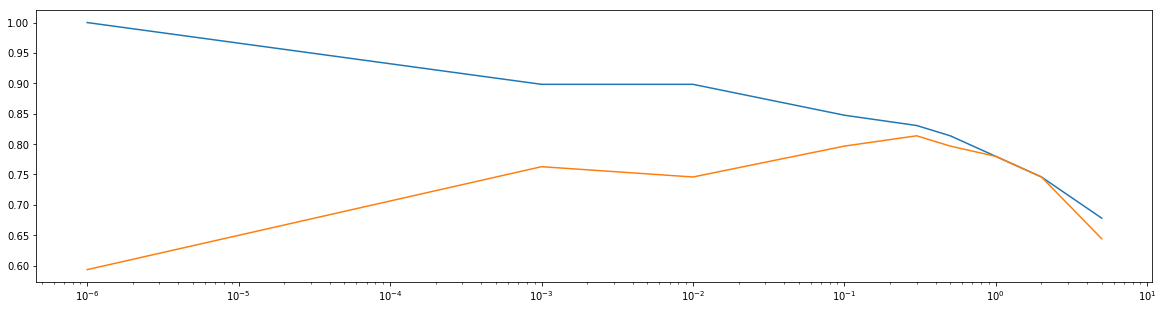

Medias de los pesos


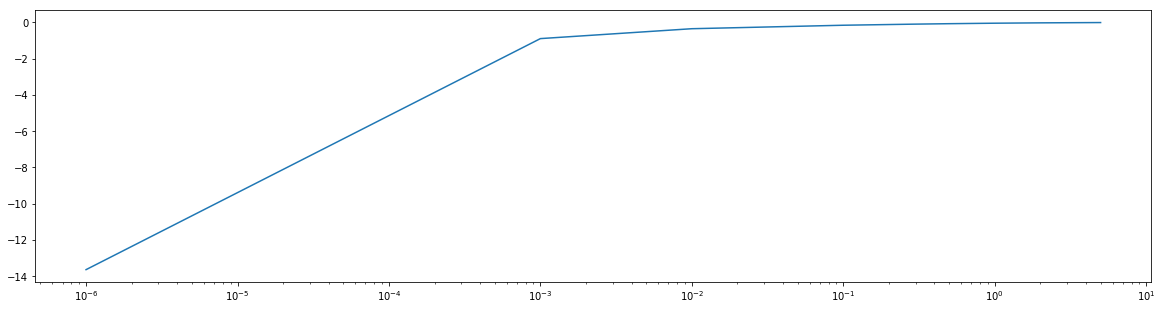

STDs de los pesos


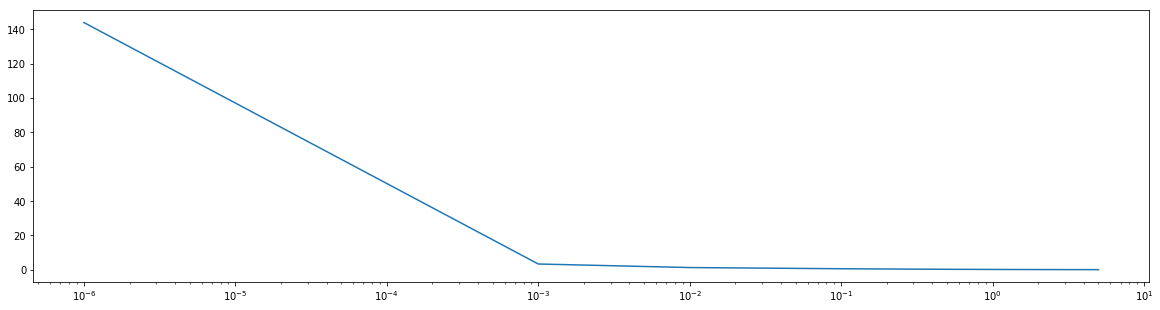

Maximo de los pesos


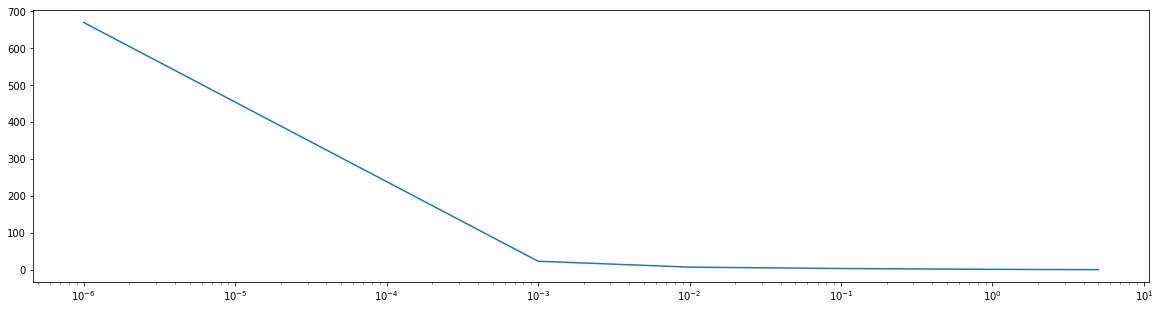

In [17]:
plt.figure(figsize=(20,5))
print("Accuracies")
plt.semilogx(lambdas_1, train_acc_array_1)
plt.semilogx(lambdas_1, test_acc_array_1)
plt.show()
plt.figure(figsize=(20,5))
print("Medias de los pesos")
plt.semilogx(lambdas_1, coefs_array_mean_1)
plt.show()
plt.figure(figsize=(20,5))
print("STDs de los pesos")
plt.semilogx(lambdas_1, coefs_array_std_1)
plt.show()
plt.figure(figsize=(20,5))
print("Maximo de los pesos")
plt.semilogx(lambdas_1, coefs_abs_max_1)
plt.show()

## LASSO (Least Absolute Shrinkage and Selection Operator) -L1 regularization- 
- Selector de parametros (Feature selection) - Puede tratar los pesos en forma independiente. Cuando un peso es cero, No importa la relación con el resto como en L2. Sí depende de la función de costo
- $g(w) = \|w\|$ 
- Sparse solution

## ElasticNet
-  Combinacion de L1 y L2

## Sparcity y LO regularization:

$w_{RR} = arg \min\| \hat{y}-y_i \|^2 + \lambda \|w\|^d$

- L0 cuenta la cantidad de $w$'s distinto de cero (d=0)
- Si d esta entre 0 y 1 aumenta la esparcibidad (sparsity) pero la funcion de costo no es convexa

## Batch normalization

![batch_norm.webp](batch_norm.webp)

https://gab41.lab41.org/batch-normalization-what-the-hey-d480039a9e3b

Cross validation  
k-fold

# Tamaño del dataset:
## AIC (Akaike information criterion) [wikipedia](https://en.wikipedia.org/wiki/Akaike_information_criterion) 
$AIC = 2k -2ln(\hat{L})$ Cantidad de muestras mucho mayor que $k^2$

$AICc = AIC + \frac{2k(k+1)}{n-k-1}$ (with correction)

k es la cantidad de parametros, $\hat{L}$ es el likelihood y n es el tamaño del dataset

## BIC (Bayesian information criterion): [wikipeedia](https://en.wikipedia.org/wiki/Bayesian_information_criterion)
$BIC = ln(n)k - 2ln(\hat{L})$
## DIC (Deviance information criterion): [wikipedia](https://en.wikipedia.org/wiki/Deviance_information_criterion) [pdf](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.58.6208&rep=rep1&type=pdf)
DIC = $log(P(X(i)) - \frac{1}{(M-1)\sum{log(P(X(all-but-i)}}$